<a href="https://colab.research.google.com/github/wiesehahn/waldmaske/blob/master/notebooks/query_osm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="ee-notebook-buttons" align="left">
    <td><a target="_blank"  href="https://github.com/wiesehahn/waldmaske/blob/master/notebooks/data_visualization.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_blank"  href="https://colab.research.google.com/github/wiesehahn/waldmaske/blob/master/notebooks/data_visualization.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# Install Earth Engine API and geemap
Install the [Earth Engine Python API](https://developers.google.com/earth-engine/python_install) and [geemap](https://github.com/giswqs/geemap). 

In [ ]:
# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

# Checks whether this notebook is running on Google Colab
try:
    import google.colab
    import geemap.eefolium as emap
except:
    import geemap as emap

# Authenticates and initializes Earth Engine
import ee

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()    

geemap package not installed. Installing ...
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=kRoyM-a6gTuZUKCRbSaIbccHWzYTESzpceug81PxvzI&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1QFFDVtSvtSS9CC85mmnQwhAqGed6fGvqLysorouGRL7w3yg2Z1gqEU

Successfully saved authorization token.


# Visualize Data

## LUCAS Survey
https://land.copernicus.eu/imagery-in-situ/lucas

The LUCAS survey, carried out by EUROSTAT on a three-yearly basis since 2006, focuses on the state and the dynamics of changes in land use and cover in the European Union. The survey is carried out in-situ; a large number of observations are made and registered throughout the EU. Since 2012, all 27 EU countries have been covered and over 270,000 points have been analysed on different land cover types (cropland, grassland, forest, built-up areas, transport network, etc.). On these points, the surveyors have examined the land cover and land use, irrigation management and structural elements in the landscape.

(used as reference data)

In [ ]:
# create Map
Map = emap.Map(center=[52,9], zoom=9)

# Add WMS Layer (LUCAS data)
lucas_url = 'https://image.discomap.eea.europa.eu/arcgis/services/LUCAS/LUCAS_2018/MapServer/WMSServer?'
Map.add_wms_layer(url=lucas_url, layers='1', name='LUCAS 2018', format='image/png', shown=False)

# Add x y z tiles 
# google_url = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'
# Map.add_tile_layer(google_url, name='Google Map', attribution='Google')

Map.addLayerControl()
Map

## EU-DEM
https://land.copernicus.eu/imagery-in-situ/eu-dem

EU-DEM v1.0 is a digital surface model (DSM) of EEA39 countries representing the first surface as illuminated by the sensors. It is a hybrid product based on SRTM and ASTER GDEM data fused by a weighted averaging approach. The statistical validation of EU-DEM v1.0 documents a relatively unbiased (-0.56 meters) overall vertical accuracy of 2.9 meters RMSE, which is fully within the contractual specification of 7m RMSE (European Commission 2009). Please read the full report here.

The following corrections and improvements have been implemented in EU-DEM v1.1:
* systematic correction of geo-positioning issues (found and corrected for Malta and Lampedusa islands);
* bias adjustment with ICESat;
* screening and removal of artefacts, including the presence of blunders (i.e. negative or positive anomalies); more than 75.000 artefacts have been detected and corrected;
* consistency with the upgraded version of EU-Hydro, in order to produce a better river network topology.


## High Resolution Image Mosaics
https://land.copernicus.eu/imagery-in-situ/european-image-mosaics/high-resolution

High Resolution satellite imagery forms the input for the creation of many information products and services, such as land cover maps or high resolution layers on land cover characteristics. Having all the satellite imagery available to cover 39 countries of EEA (EEA39), it is worthwhile to process the individual image scenes into a seamless pan-European ortho-rectified mosaic.

The HR Mosaic for 2018 has been produced using Sentinel 2 data in 10 meter resolution over the EEA 39. This data was produced at a Sentinel 2 tile level and consisted of 1079 Sentinel 2 tiles. 

In [ ]:
# create Map
Map = emap.Map(center=[52,9], zoom=9)


# Add Earth Engine dataset (SRTM)
srtm = ee.Image('USGS/SRTMGL1_003')

vis_srtm = {
  'min': 0,
  'max': 1000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

Map.addLayer(srtm, vis_srtm, 'SRTM DEM', False)

dem_url = 'https://image.discomap.eea.europa.eu/arcgis/services/Elevation/EUElev_DEM_V11/MapServer/WmsServer?'
Map.add_wms_layer(url=dem_url, layers='DEM_v11_Masked2', name='EU-DEM v1.1', format='image/png', shown=False)

# hrim_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLand/HRIM_HR_FalseColour_2018/ImageServer/WMSServer'
# Map.add_wms_layer(url=hrim_url, layers='0', name='High Resolution Image Mosaic 2018 - False Colour (10m)', format='image/jpeg', shown=False)

Map.addLayerControl()
Map

## Copernicus High Resolution Layers

### Forests
https://land.copernicus.eu/pan-european/high-resolution-layers/forests

The HRL Forests consists of 3 types of (status) products, and additional change products. The status products are available for 2012 and 2015 reference years:

* Tree cover density (TCD) (level of tree cover density in a range from 0-100%)
*Dominant leaf type (DLT) (broadleaved or coniferous majority)
*A Forest type product (FTY). The forest type product allows to get as close as possible to the FAO forest definition. In its original (20m) resolution it consists of two products: 1) a dominant leaf type product that has a MMU of 0.5 ha, as well as a 10% tree cover density threshold applied, and 2) a support layer that maps, based on the dominant leaf type product, trees under agricultural use and in urban context (derived from CLC and imperviousness 2009 data). For the final 100m product trees under agricultural use and urban context from the support layer are removed.

Please find a more detailed product specification in the [technical document](https://land.copernicus.eu/pan-european/high-resolution-layers/forests/resolveuid/7a979c884e1649e882b71ba2f99b2c80).

### Grassland
https://land.copernicus.eu/pan-european/high-resolution-layers/grassland

The main product is a binary grassland/non-grassland product in 20m pixels size, that is supposed to include the full spectrum of grassland use intensity (from natural to managed grasslands). Please find a more detailed product specification in the [technical document](https://land.copernicus.eu/pan-european/high-resolution-layers/grassland/resolveuid/8f075cec57bd4fe1907829937c751703).

### Small Woody Features
https://land.copernicus.eu/pan-european/high-resolution-layers/small-woody-features

The HRL Small Woody Features (SWF) is a new CLMS product, which provides harmonized information on linear structures such as hedgerows, as well as patches (200 m² ≤ area ≤ 5000 m²) of woody features across the EEA39 countries. Please find a more detailed product specification in the [technical document](https://land.copernicus.eu/pan-european/high-resolution-layers/small-woody-features/resolveuid/94fd0d3e19ed449eba2f2ad0560cd09b).

## Related Pan-European Products

### European Settlement map
https://land.copernicus.eu/pan-european/GHSL/european-settlement-map

The European Settlement Map is a spatial raster dataset that is mapping human settlements in Europe based on SPOT5 and SPOT6 satellite imagery.

## Local Data

### Urban Atlas
https://land.copernicus.eu/local/urban-atlas

The Urban Atlas provides pan-European comparable land cover and land use data for Functional Urban Areas (FUA). The full dataset, when completed, will cover 788 FUAs covering EU27 + EFTA countries + West Balkans + Turkey + UK. It is currently composed of 438 Functional Urban Areas (FUA).

The products are:
* The 2018 edition of the Land Cover/Land Use product of Urban Atlas. 
* The 2012-2018 change product, and
* The revised 2012 edition of Urban Atlas
* Street Tree Layer (STL)

The nomenclature of the Land Cover/Land Use product is the same as for the 2012 version. It includes 17 urban classes with MMU 0.25 ha and 10 Rural Classes with MMU 1ha and can be found [here](https://land.copernicus.eu/user-corner/technical-library/urban_atlas_2012_2018_mapping_guide_v6-1.pdf).




In [ ]:
# create Map
Map = emap.Map(center=[52,9], zoom=9)

# imp_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/HRL_ImperviousnessDensity_2015/MapServer/WmsServer?'
# Map.add_wms_layer(url=stl_url, layers=['0'], name='Copernicus HRL - Imperviousness 2015', format='image/png', shown=True)

tcd_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/HRL_TreeCoverDensity_2015/MapServer/WmsServer?'
Map.add_wms_layer(url=tcd_url, layers=['0', '1'], name='Copernicus HRL - Tree Cover Density 2015', format='image/png', shown=False)

dlt_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/HRL_DominantLeafType_2015/MapServer/WmsServer?'
Map.add_wms_layer(url=dlt_url, layers=['0'], name='Copernicus HRL - Dominant Leaf Type 2015', format='image/png', shown=False)

fty_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/HRL_ForestType_2015/MapServer/WmsServer?'
Map.add_wms_layer(url=fty_url, layers=['HRL Forest Type 2015 20m', 'HRL Forest Type 2015 100m'], name='Copernicus HRL - Forest Type 2015', format='image/png', shown=False)

fadsl_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/HRL_ForestAdditionalSupportLayer_2015/MapServer/WmsServer?'
Map.add_wms_layer(url=fadsl_url, layers=['0'], name='Copernicus HRL - Forest Additional Support Layer 2015', format='image/png', shown=False)

grass_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/HRL_Grassland_2015/MapServer/WmsServer?'
Map.add_wms_layer(url=grass_url, layers=['0', '1'], name='Copernicus HRL - Grassland 2015', format='image/png', shown=False)

swf_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/HRL_SmallWoodyFeatures_2015_005m/ImageServer/WMSServer'
Map.add_wms_layer(url=swf_url, layers=['0'], name='Copernicus HRL - Small Woody Features 2015', format='image/png', shown=False)

esm_url = 'https://image.discomap.eea.europa.eu/arcgis/services/GioLandPublic/ESM2015_R2019_WM/ImageServer/WMSServer'
Map.add_wms_layer(url=esm_url, layers=['0'], name='European Settlement Map 2015', format='image/png', shown=False)

ua_url = 'https://image.discomap.eea.europa.eu/arcgis/services/UrbanAtlas/UA_UrbanAtlas_2018/MapServer/WmsServer?'
Map.add_wms_layer(url=ua_url, layers=['Land Use vector', 'Land Use Raster'], name='Copernicus UA - Urban Atlas 2018', format='image/png', shown=False)

stl_url = 'https://image.discomap.eea.europa.eu/arcgis/services/UrbanAtlas/UA_StreetTreeLayer_2018/MapServer/WmsServer?'
Map.add_wms_layer(url=stl_url, layers=['STL 2018 Vector', 'STL 2018 Raster'], name='Copernicus UA - Street Tree Layer 2018', format='image/png', shown=False)


Map.addLayerControl()
Map

## Project data

### Random Forest Classification

A random forest classification was performed as part of this project to classify forest and non-forest areas in Germany based on Seninel-2 imagery. 

Displayed here is the forest mask for a test region around Göttingen, Germany.

The Method can be seen [here](https://github.com/wiesehahn/waldmaske/tree/master/scripts/gee/rf)

In [ ]:
Map = emap.Map(center=[51.5352, 9.93843], zoom=14)

Map.add_basemap('SATELLITE')

rf_classification = ee.Image.load('users/wiesehahn/waldmaske/classification/map/classification_32unc_20200623')
Map.addLayer(rf_classification.updateMask(rf_classification.eq(0)), {'palette': ['ff0000', '000000']}, 'Forest Mask', True, 0.5);

Map.addLayerControl()
Map

# OSM Data
Loading Data from OpenStreetMap with Python and the Overpass API

In [36]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
(
  way
  ["highway"]
  [highway!~"footway|path|bridleway|steps"]
  [tracktype!~"grade4|grade5"]
  (51.504442609479455,9.940686323657957,51.5633863622234,10.057416059986082);
);
out skel;
>;
out skel geom 50 qt;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()
print(data['elements'])

[{'type': 'way', 'id': 4532303, 'nodes': [3082069259, 2055657147, 2203599097]}, {'type': 'way', 'id': 4532350, 'nodes': [28125842, 4569721392, 7567621510, 4775378214, 4775378210, 28125851]}, {'type': 'way', 'id': 4532531, 'nodes': [28128855, 3339530217, 1828762078, 274061577, 305437524, 1828762075]}, {'type': 'way', 'id': 8091764, 'nodes': [1737715592, 5378423935, 389525668, 3564488879, 269379691, 3569212513, 3569212524, 3582962164, 3582962180, 388541243, 3582962194, 3564517731, 3582962216, 60347168]}, {'type': 'way', 'id': 8091768, 'nodes': [28127584, 1022772064, 2620055860, 278930319]}, {'type': 'way', 'id': 8091769, 'nodes': [280727811, 280727810, 1828458918, 2500251451, 280727809, 3582962171, 3582962167, 3582962163, 3582962145, 269379695, 3582962095, 60345253, 3582962063, 3582962048, 3582962033, 1828458915, 3582961999, 3582961791, 3582961767, 83678040]}, {'type': 'way', 'id': 8091771, 'nodes': [268466933, 4665925491, 2467992140, 2467992139, 3441223567, 1633773135, 3524218008, 46659

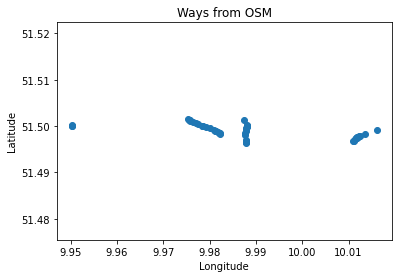

In [37]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Ways from OSM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

*fix:*
Aktuell bekomme ich nur die Nodes der Wege, ich möchte aber die Linie als Geometrie. 